In [ ]:
!pip -q install kaggle
import zipfile, pathlib
import pandas as pd

pathlib.Path('/root/.kaggle').mkdir(parents=True, exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Descarga
!kaggle datasets download -d blastchar/telco-customer-churn -p /content

# Descomprimir
with zipfile.ZipFile('/content/telco-customer-churn.zip', 'r') as z:
    z.extractall('/content/telco-customer-churn')

!ls -lh /content/telco-customer-churn

df = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 434MB/s]
total 956K
-rw-r--r-- 1 root root 955K Sep  5 01:40 WA_Fn-UseC_-Telco-Customer-Churn.csv


## General Customer Profile

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
display(df[['tenure', 'MonthlyCharges', 'TotalCharges']].median())

,0
tenure,29.000
MonthlyCharges,70.350
TotalCharges,1397.475


## Distribution Visualization

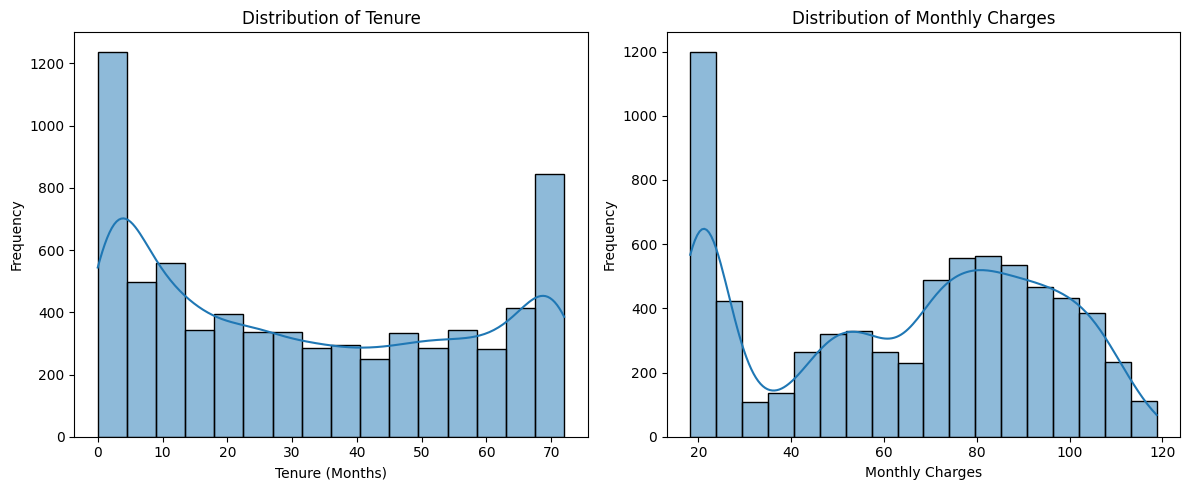

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Segment Analysis

In [ ]:
churn_median = df.groupby('Churn')[['tenure', 'MonthlyCharges']].median()
display(churn_median)

,tenure,MonthlyCharges
Churn,,
No,38.0,64.425
Yes,10.0,79.650


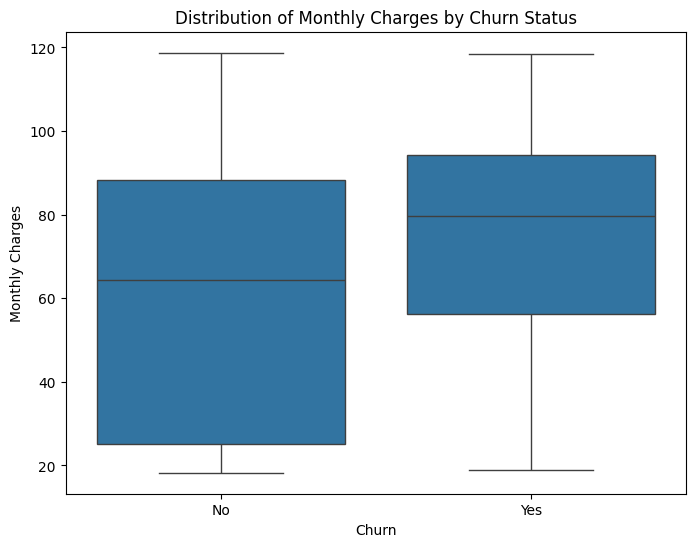

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()